# **Import Necessary Libraries**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import plot_model
from keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import layers, models
from keras.layers import Dense, Flatten, Dropout, BatchNormalization

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,recall_score,precision_score

# **Load the images**

In [2]:
# Load the Training images with 20% of it as Validation.
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    labels="inferred", # The folder name become the class label
    class_names=None,
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    interpolation="bilinear",
    crop_to_aspect_ratio=False, # resizes without preserving the original aspect ratio
    shuffle=True,
    seed=42,  # Seed for reproducibility
    validation_split=0.2,  # 20% for validation
    subset='training',     # Select training subset
    follow_links=False
)

Found 70295 files belonging to 38 classes.
Using 56236 files for training.


In [3]:
# Load the Training images with 20% of it as Validation.
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    labels="inferred", # The folder name become the class label
    class_names=None,
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    interpolation="bilinear",
    crop_to_aspect_ratio=False, # resizes without preserving the original aspect ratio
    shuffle=True,
    seed=42,  # Seed for reproducibility
    validation_split=0.2,  # 20% for validation
    subset='validation',     # Select training subset
    follow_links=False
)

Found 70295 files belonging to 38 classes.
Using 14059 files for validation.


In [4]:
# Load the Test images
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


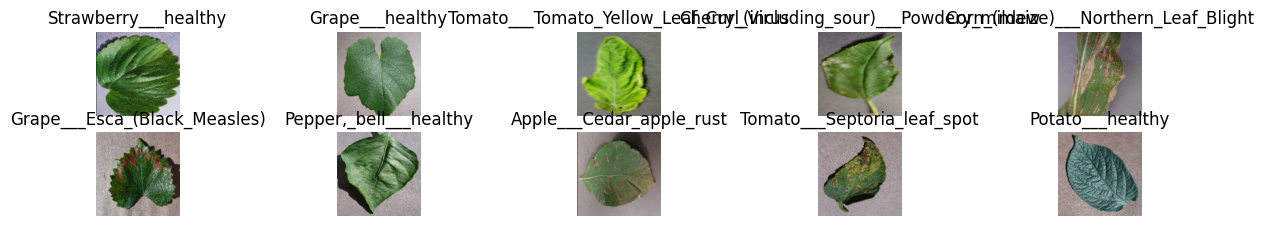

In [42]:
# Fetch a batch of data from the dataset
class_names = training_set.class_names
plt.figure(figsize=(15, 5))  # Adjust figure size for 2 rows and 5 columns

# Loop through the first batch (first 10 images) in the dataset
for images, labels in training_set.take(1):  # Take one batch of data
    for i in range(10):  # We only want to display 10 images
        ax = plt.subplot(4, 5, i + 1)  # 5 rows, 5 columns
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert image tensor to uint8 for display
        plt.title(class_names[labels[i].numpy().argmax()])  # Display class name based on the label
        plt.axis("off")  # Turn off the axis display

plt.show()

# **CNN Model**

In [10]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [19]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

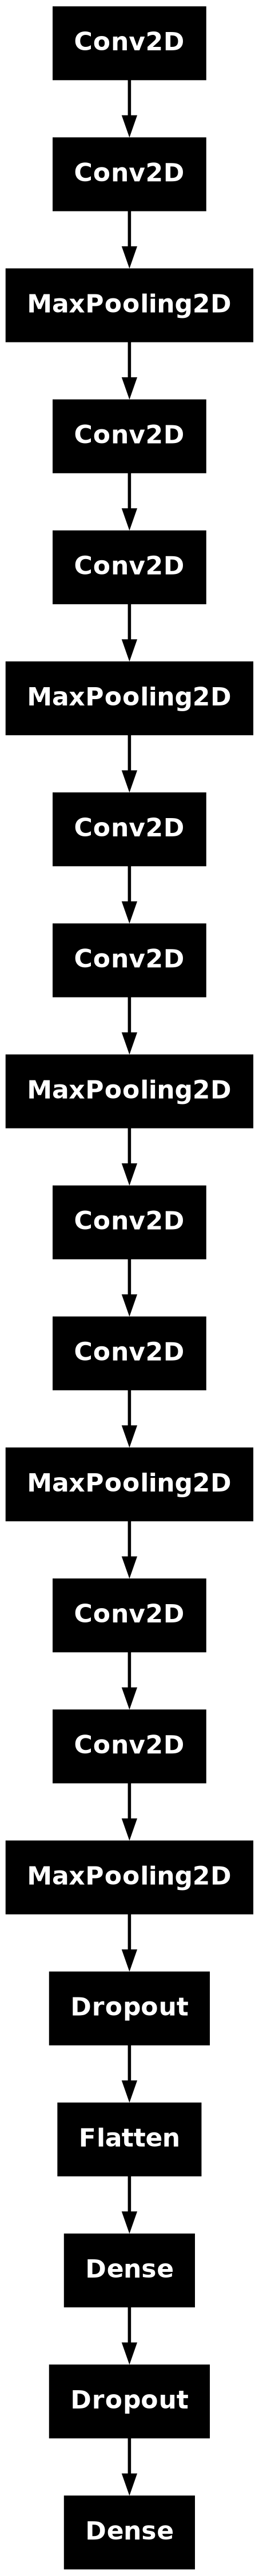

In [24]:
# plot the model
plot_model(cnn)

In [17]:
training_history = cnn.fit(
    training_set,
    validation_data=validation_set,
    epochs=10
)

Epoch 1/10


I0000 00:00:1727939411.683308     167 service.cc:145] XLA service 0x7a7bec003e20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727939411.683367     167 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727939411.683372     167 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   2/1758 ━━━━━━━━━━━━━━━━━━━━ 2:10 74ms/step - accuracy: 0.0547 - loss: 4.5702  

I0000 00:00:1727939424.620885     167 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1758/1758 ━━━━━━━━━━━━━━━━━━━━ 126s 63ms/step - accuracy: 0.3413 - loss: 2.3598 - val_accuracy: 0.7912 - val_loss: 0.6711
Epoch 2/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 89s 50ms/step - accuracy: 0.7989 - loss: 0.6451 - val_accuracy: 0.8942 - val_loss: 0.3340
Epoch 3/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 89s 50ms/step - accuracy: 0.8851 - loss: 0.3599 - val_accuracy: 0.9223 - val_loss: 0.2436
Epoch 4/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 89s 50ms/step - accuracy: 0.9228 - loss: 0.2403 - val_accuracy: 0.9252 - val_loss: 0.2341
Epoch 5/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 88s 50ms/step - accuracy: 0.9408 - loss: 0.1783 - val_accuracy: 0.9392 - val_loss: 0.1901
Epoch 6/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 88s 50ms/step - accuracy: 0.9521 - loss: 0.1424 - val_accuracy: 0.9476 - val_loss: 0.1693
Epoch 7/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 88s 50ms/step - accuracy: 0.9647 - loss: 0.1122 - val_accuracy: 0.9599 - val_loss: 0.1257
Epoch 8/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 88s 50ms/step - accuracy: 0.9705 - loss: 0.0

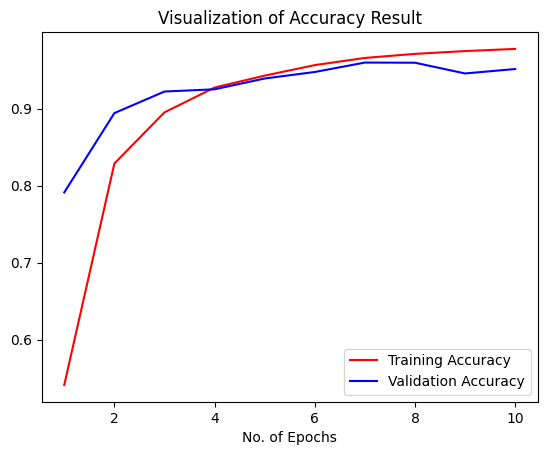

In [18]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

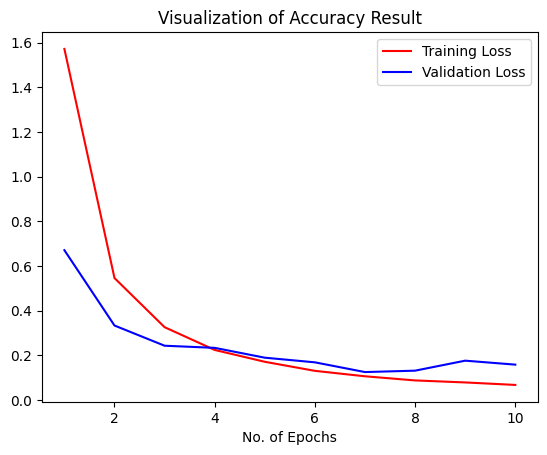

In [22]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## **Evaluate the Model**

In [51]:
# Evaluate the model on the validation set
test_loss, test_accuracy = cnn.evaluate(test_set)

# Print the validation loss and accuracy
print(f"Validation Loss: {round(test_loss,4)}")
print(f"Validation Accuracy: {round(test_accuracy,2)}%")

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9464 - loss: 0.1845
Validation Loss: 0.1812
Validation Accuracy: 0.95%


In [53]:
# Predict class probabilities on the test set
predictions = cnn.predict(test_set)
predicted_classes = tf.argmax(predictions, axis=1)

# Get true labels from the validation set
true_classes = tf.concat([y for x, y in test_set], axis=0)
true_classes = tf.argmax(true_classes, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step


In [54]:
# Generate classification report
class_report = classification_report(true_classes, predicted_classes, target_names=test_set.class_names)
print("Classification Report:\n", class_report)

Classification Report:
                                                     precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.93      0.93       504
                                 Apple___Black_rot       0.99      0.89      0.94       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.97       440
                                   Apple___healthy       0.96      0.92      0.94       502
                               Blueberry___healthy       0.95      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.95      0.99      0.97       421
                 Cherry_(including_sour)___healthy       0.97      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.87      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight     

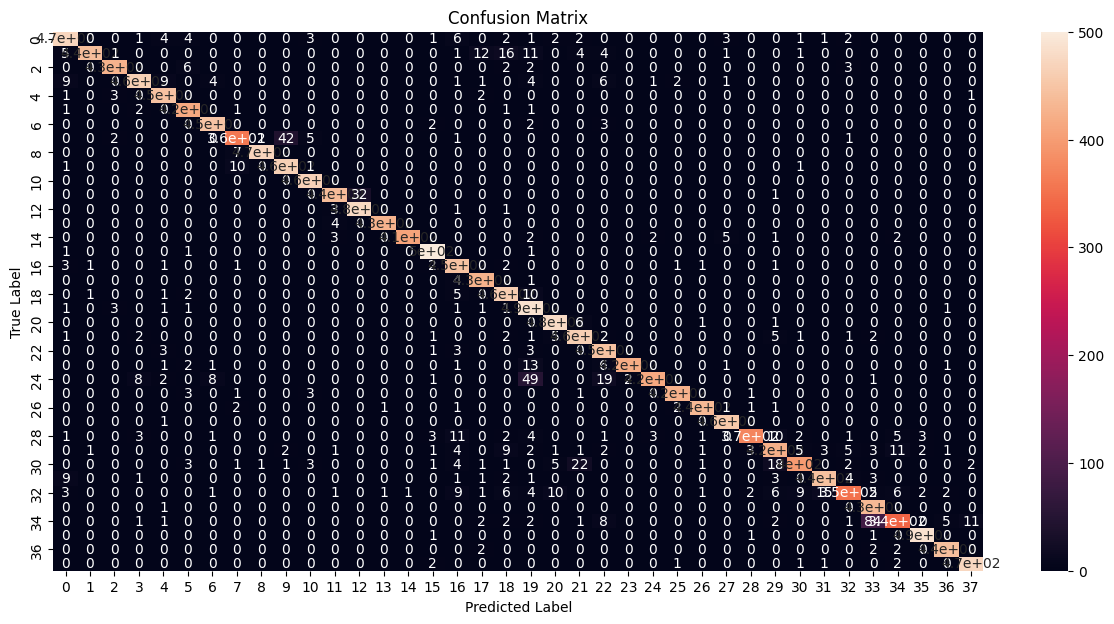

In [56]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Saving the model
cnn.save("CNN_model.h5")

# **VGG16 Model**

In [11]:
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16
base_model = VGG16(weights = "imagenet", include_top=False, input_shape = (128,128, 3))

In [12]:
# iterate through its layers and lock them to make them not trainable with this code
for layer in base_model.layers[:-5]:
    layer.trainable = False

In [13]:
vgg16_model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(training_set.class_names), activation='softmax')
    ])

vgg16_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [14]:
vgg16_model.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
vgg16_history = vgg16_model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10
)

Epoch 1/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 129s 70ms/step - accuracy: 0.3542 - loss: 2.4786 - val_accuracy: 0.9356 - val_loss: 0.1994
Epoch 2/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 120s 68ms/step - accuracy: 0.9142 - loss: 0.2878 - val_accuracy: 0.9555 - val_loss: 0.1481
Epoch 3/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 120s 68ms/step - accuracy: 0.9561 - loss: 0.1502 - val_accuracy: 0.9718 - val_loss: 0.0907
Epoch 4/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 120s 68ms/step - accuracy: 0.9704 - loss: 0.1014 - val_accuracy: 0.9669 - val_loss: 0.1283
Epoch 5/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 120s 68ms/step - accuracy: 0.9769 - loss: 0.0753 - val_accuracy: 0.9696 - val_loss: 0.1240
Epoch 6/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 120s 68ms/step - accuracy: 0.9818 - loss: 0.0671 - val_accuracy: 0.9726 - val_loss: 0.0980
Epoch 7/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 120s 68ms/step - accuracy: 0.9863 - loss: 0.0509 - val_accuracy: 0.9708 - val_loss: 0.1169
Epoch 8/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 120s 68ms/step - accuracy: 

In [16]:
vgg16_model.save("vgg16.h5")

## **Evaluate the Model**

In [17]:
# Evaluate the model on the validation set
test_loss, test_accuracy = vgg16_model.evaluate(test_set)

# Print the validation loss and accuracy
print(f"Validation Loss: {round(test_loss,4)}")
print(f"Validation Accuracy: {round(test_accuracy,2)}%")

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 90s 5ms/step - accuracy: 0.9699 - loss: 0.1354
Validation Loss: 0.1346
Validation Accuracy: 0.97%


In [18]:
# Predict class probabilities on the test set
predictions = vgg16_model.predict(test_set)
predicted_classes = tf.argmax(predictions, axis=1)

# Get true labels from the validation set
true_classes = tf.concat([y for x, y in test_set], axis=0)
true_classes = tf.argmax(true_classes, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 73s 4ms/step


In [19]:
# Generate classification report
class_report = classification_report(true_classes, predicted_classes, target_names=test_set.class_names)
print("Classification Report:\n", class_report)

Classification Report:
                                                     precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       504
                                 Apple___Black_rot       0.99      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.95      0.99      0.97       440
                                   Apple___healthy       1.00      0.94      0.97       502
                               Blueberry___healthy       0.99      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.96      0.93       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight     

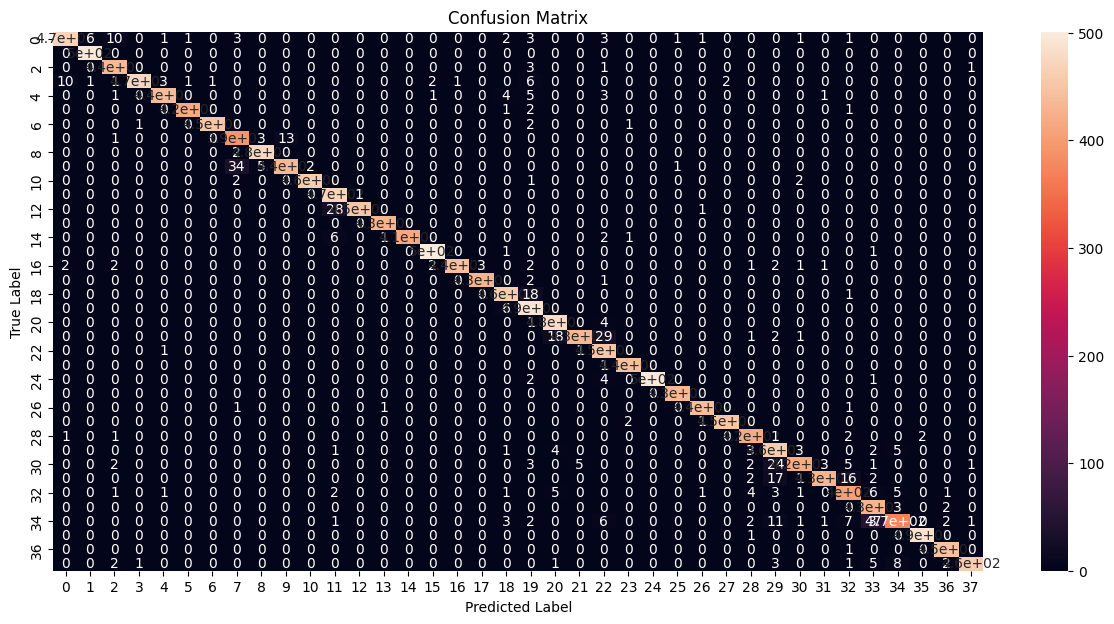

In [20]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **ResNet50 Model**

In [22]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3),classes=38)

In [23]:
# iterate through its layers and lock them to make them not trainable with this code
for layer in base_model.layers[:-5]:
    layer.trainable = False

resnet50_model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(training_set.class_names), activation='softmax')  # Adjust output units
    ])
resnet50_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 1,054,720 (4.02 MB)

 Non-trainable params: 22,532,992 (85.96 MB)

In [24]:
# Compile the model
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
resnet50_history = resnet50_model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10
)

Epoch 1/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 90s 44ms/step - accuracy: 0.7311 - loss: 0.9537 - val_accuracy: 0.9409 - val_loss: 0.1789
Epoch 2/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9124 - loss: 0.2659 - val_accuracy: 0.9538 - val_loss: 0.1376
Epoch 3/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9354 - loss: 0.1936 - val_accuracy: 0.9557 - val_loss: 0.1378
Epoch 4/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9476 - loss: 0.1542 - val_accuracy: 0.9619 - val_loss: 0.1197
Epoch 5/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9562 - loss: 0.1295 - val_accuracy: 0.9646 - val_loss: 0.1120
Epoch 6/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9645 - loss: 0.1069 - val_accuracy: 0.9621 - val_loss: 0.1313
Epoch 7/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9683 - loss: 0.0973 - val_accuracy: 0.9681 - val_loss: 0.1074
Epoch 8/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9708 -

## **Evaluate the Model**

In [26]:
# Evaluate the model on the validation set
test_loss, test_accuracy = resnet50_model.evaluate(test_set)

# Print the validation loss and accuracy
print(f"Validation Loss: {round(test_loss,4)}")
print(f"Validation Accuracy: {round(test_accuracy,2)}%")

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 136s 8ms/step - accuracy: 0.9794 - loss: 0.0860
Validation Loss: 0.1152
Validation Accuracy: 0.97%


In [27]:
# Predict class probabilities on the test set
predictions = resnet50_model.predict(test_set)
predicted_classes = tf.argmax(predictions, axis=1)

# Get true labels from the validation set
true_classes = tf.concat([y for x, y in test_set], axis=0)
true_classes = tf.argmax(true_classes, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 98s 5ms/step


In [28]:
# Generate classification report
class_report = classification_report(true_classes, predicted_classes, target_names=test_set.class_names)
print("Classification Report:\n", class_report)

Classification Report:
                                                     precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.99      0.98       504
                                 Apple___Black_rot       1.00      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.98       440
                                   Apple___healthy       0.98      0.98      0.98       502
                               Blueberry___healthy       0.98      1.00      0.99       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      1.00       421
                 Cherry_(including_sour)___healthy       1.00      0.99      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.89      0.93       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight     

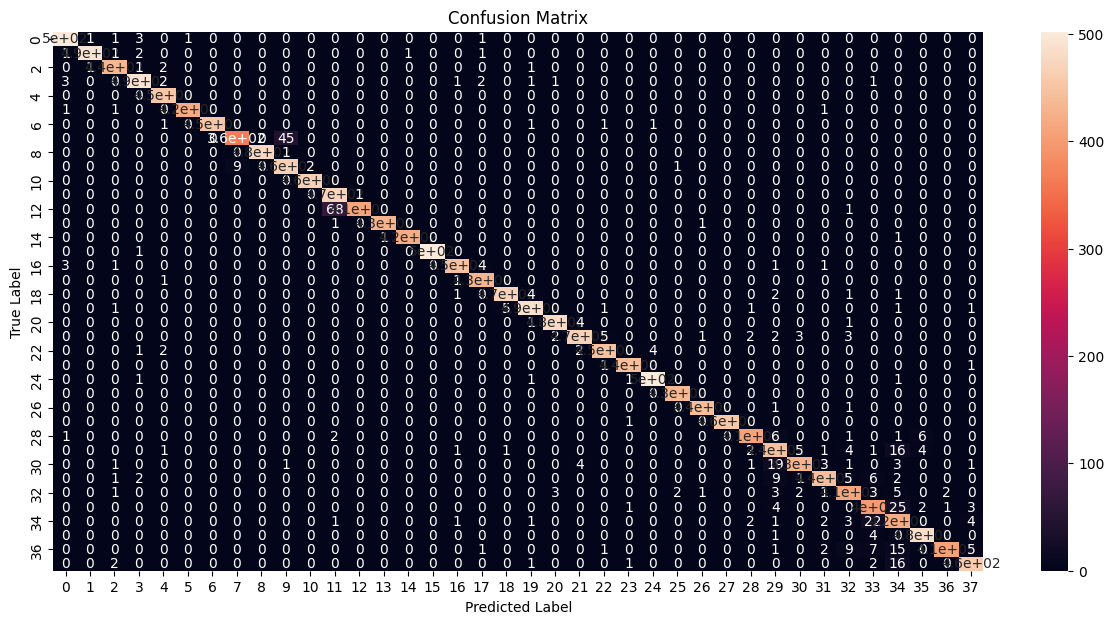

In [29]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **InceptionV3 Model**

In [30]:
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
# iterate through its layers and lock them to make them not trainable with this code
for layer in base_model.layers[:-5]:
    layer.trainable = False

inceptionv3_model  = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(training_set.class_names), activation='softmax')  # Adjust output units
])

In [32]:
inceptionv3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
inceptionv3_history = resnet50_model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10
)

Epoch 1/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9787 - loss: 0.0658 - val_accuracy: 0.9718 - val_loss: 0.1083
Epoch 2/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 37ms/step - accuracy: 0.9814 - loss: 0.0579 - val_accuracy: 0.9711 - val_loss: 0.1144
Epoch 3/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9812 - loss: 0.0611 - val_accuracy: 0.9740 - val_loss: 0.1152
Epoch 4/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9831 - loss: 0.0587 - val_accuracy: 0.9691 - val_loss: 0.1365
Epoch 5/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9845 - loss: 0.0532 - val_accuracy: 0.9724 - val_loss: 0.1314
Epoch 6/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9849 - loss: 0.0507 - val_accuracy: 0.9751 - val_loss: 0.1064
Epoch 7/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9861 - loss: 0.0452 - val_accuracy: 0.9753 - val_loss: 0.1099
Epoch 8/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9874 -